# Machine Learning Recipes with Jsh Gordon Note 

[Video list](https://goo.gl/KewA03)

this is a note for watching Machine Learning Recipes with Jsh Gordon

# 1

In [1]:
from sklearn import tree

In [2]:
features = [[140, 1], [130, 1], [150, 0], [170, 0]]
labels = [0, 0, 1, 1]

In [4]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(features, labels)

In [7]:
print(clf.predict([[120, 0]]))

[0]


## Import Concepts

* How does this work in the real world?
* How much training data do you need?
* How is the tree created?
* What makes a good feature?

## 2

### Many types of classifiers

* Artificial neural network
* Support Vector Machine
* Lions
* Tigers
* Bears
* Oh my!

### Goals

#### 1. Import dataset

In [15]:
from sklearn.datasets import load_iris
import numpy as np
iris = load_iris()
print(iris.feature_names)
print(iris.target_names)
print(iris.data[0])
print(iris.target[0])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
[ 5.1  3.5  1.4  0.2]
0


#### Testing Data

* Examples used to "test" the classifier's accuracy.
* Not part of the training data.

Just like in programming, testing is a very important
part of ML.

In [23]:
test_idx = [0, 50, 100]

# training data
train_target = np.delete(iris.target, test_idx)
train_data = np.delete(iris.data, test_idx, axis=0)
print(train_target.shape)
print(train_data.shape)

# testing data
test_target = iris.target[test_idx]
test_data = iris.data[test_idx]
print(test_target.shape)
print(test_data.shape)

(147,)
(147, 4)
(3,)
(3, 4)


#### 2. Train a classifier

In [24]:
clf = tree.DecisionTreeClassifier()
clf.fit(train_data, train_target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#### 3. Predict label for new flower.

In [25]:
print(test_target)
print(clf.predict(test_data))

[0 1 2]
[0 1 2]


#### 4. Visualize the tree.

In [32]:
# viz code
from sklearn.externals.six import StringIO
import pydotplus
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data,
                    feature_names=iris.feature_names,
                    class_names=iris.target_names,
                    filled=True, rounded = True,
                    impurity=False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf('iris.pdf')

True

### More to learn

* How are trees built automatically from examples?
* How well do they work in parctice?

## 3 What Makes a Good Feature?

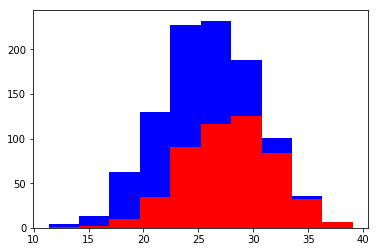

In [36]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt 

greyhounds = 500
labs = 500

grey_height = 28 + 4 * np.random.randn(greyhounds)
lab_height = 24 + 4 * np.random.randn(labs)

plt.hist([grey_height, lab_height], stacked=True, color=['r', 'b'])
plt.show()

#### Analysis
35 肯定是 greyhounds

20左右是 lab的几率最大

但是很难判断在25左右的时候是谁. 所以这个 Feature 是好的, 但不是充分的.

#### 所以问题是: 我们需要多少 Feature? 


#### 注意事项

* Avoid redundant features: 例如 用英尺做单位的高度, 用厘米做单位的高度
* Features should be easy to understand: 
    例如 预测邮件发送时间, 使用距离和发送所用天数 而不选择使用经纬度坐标. SImpler relationships are easier to learn

#### Ideal features are

* Informative
* Independent
* Simple

## 4. Lets Write a Pipeline

In [40]:
from sklearn import datasets
iris = datasets.load_iris()

X = iris.data # input: features
y = iris.target # output: label

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .5)

# from sklearn import tree
# my_classifier = tree.DecisionTreeClassifier()

from sklearn.neighbors import KNeighborsClassifier
my_classifier = KNeighborsClassifier()

my_classifier.fit(X_train, y_train)

predictions = my_classifier.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions))


0.973333333333


#### what is X, y?
X: features
y: labels

``` python
    def classify(features):
    # do some logic
    return label

```

## 5. Write Our First Classifier

In [71]:
from scipy.spatial import distance

def euc(a, b):
    return distance.euclidean(a, b)
    
class ScrappyKNN():
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    
    def predict(self, X_test):
        predictions = []
        for row in X_test:
            label = self.closest(row)
            predictions.append(label)
        return predictions
    
    def closest(self, row):
        best_dist = euc(row, self.X_train[0])
        best_index = 0
        for i in range(1, len(self.X_train)):
            dist = euc(row, self.X_train[i])
            if dist < best_dist:
                best_dist = dist
                best_index = i
        return self.y_train[best_index]

In [72]:
from sklearn import datasets
iris = datasets.load_iris()

X = iris.data # input: features
y = iris.target # output: label

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .5)

my_classifier = ScrappyKNN()

my_classifier.fit(X_train, y_train)

predictions = my_classifier.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions))

0.946666666667


## 6. Train an Image Classifier with TensorFlow for Poets

## 7. Classifying Handwritten Digits with TF.Learn

## 8. Let's Write a Decision Tree Classifier from Scratch